In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
sns.set()

TODOs:

* renombrar columnas
* scatterplot
* Separar datos en entrenamiento y test
* Algoritmos:
* Regresión lineal
* Regresión polinómica
* Regresión regularizada L1
* Regresión regularizada L2
* Regresión regularizada L1 + L2
* KNN
* SVM
* CART
* Ensembles: RF, Ada, GBM

Evaluar las distintas métricas de regresión: r2, MAE, MSE...

In [2]:
df = pd.read_csv('../data/xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [56]:
df.describe()

,signal,density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [3]:
df.shape

(300, 2)

In [4]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [5]:
df.columns = ['signal', 'density']
df.columns

Index(['signal', 'density'], dtype='object')

<AxesSubplot:xlabel='signal', ylabel='density'>

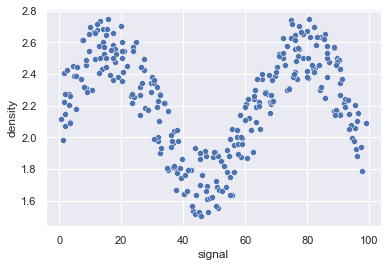

In [7]:
sns.scatterplot(data=df, x='signal', y='density')

## Preparar X, y

In [19]:
X = df[['signal']]
# X = df['signal'].values.reshape(-1, 1)
print(X.ndim)
print(X.shape)
print(type(X))

2
(300, 1)
<class 'pandas.core.frame.DataFrame'>


In [21]:
y = df['density']
print(y.ndim)
print(y.shape)
print(type(y))

1
(300,)
<class 'pandas.core.series.Series'>


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelado

In [71]:
def calc_predictions(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("R2: ", r2_score(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

    input = np.arange(0,100)
    output = model.predict(input.reshape(-1, 1))

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='signal', y='density')
    plt.plot(input, output)

    # opción 2 de visualización
    # plt.scatter(X_train, y_train) # train (azul)
    # plt.scatter(X_test, y_test) # test (naranja)
    # plt.scatter(X_test, y_pred) # predicciones (verde)

R2:  -0.021940562340498238
MAE:  0.25408953575869814
MSE:  0.09525517791325863
RMSE:  0.3086343757802404


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


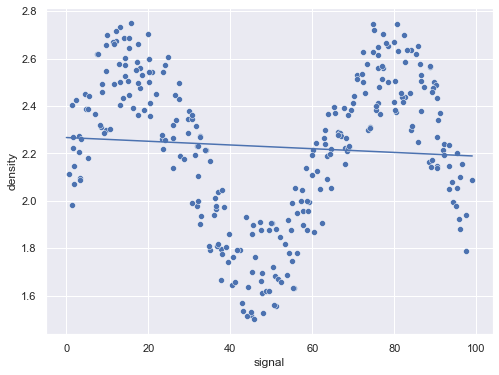

In [72]:
calc_predictions(LinearRegression())

R2:  -0.0043593204929204266
MAE:  0.25075499399897144
MSE:  0.09361642867299795
RMSE:  0.3059680190363005


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


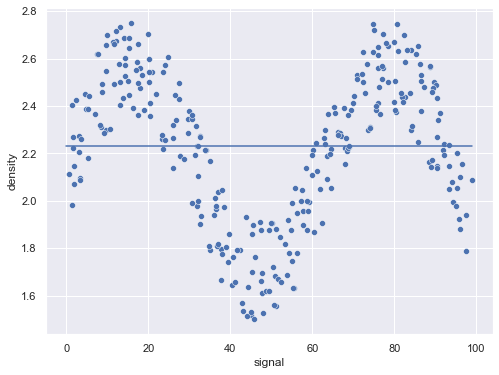

In [74]:
from sklearn.linear_model import Lasso

calc_predictions(Lasso())

R2:  -0.02194042898386983
MAE:  0.25408951123605705
MSE:  0.09525516548307449
RMSE:  0.3086343556428456


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


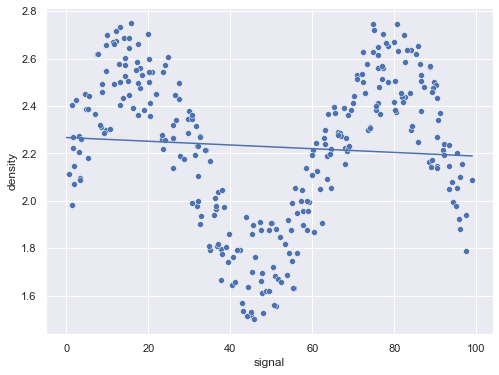

In [76]:
from sklearn.linear_model import Ridge

calc_predictions(Ridge())

R2:  -0.006712011905445792
MAE:  0.2512948629690785
MSE:  0.09383572326539757
RMSE:  0.306326171368686


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


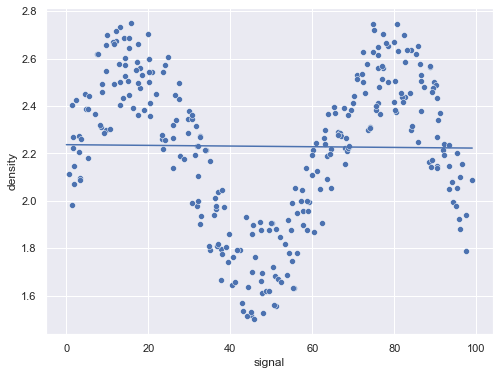

In [79]:
calc_predictions(ElasticNet())

R2:  0.8058309211238625
MAE:  0.11696164939717393
MSE:  0.018098518480605643
RMSE:  0.13453073433459597


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


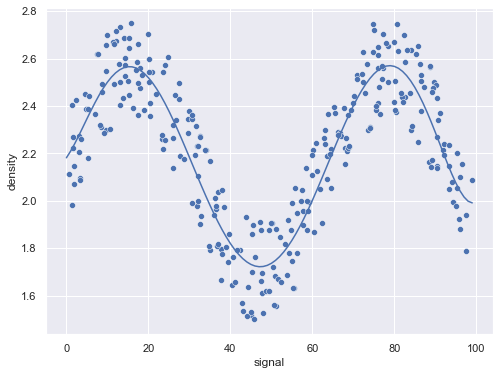

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=6),
    LinearRegression()
)
calc_predictions(model)

R2:  0.777157084101699
MAE:  0.12358313133304785
MSE:  0.020771209581883127
RMSE:  0.14412220363942235


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


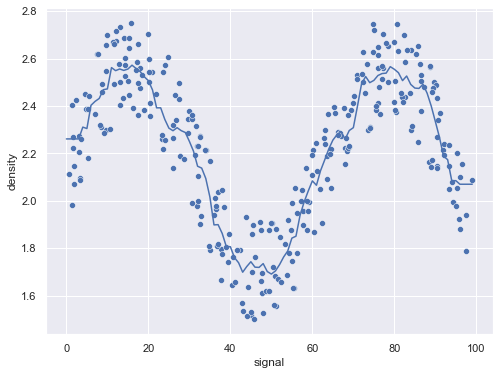

In [102]:
from sklearn.neighbors import KNeighborsRegressor

calc_predictions(KNeighborsRegressor(n_neighbors=10))

R2:  0.8004749226304275
MAE:  0.1176658757593707
MSE:  0.018597751614308485
RMSE:  0.13637357373886072


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


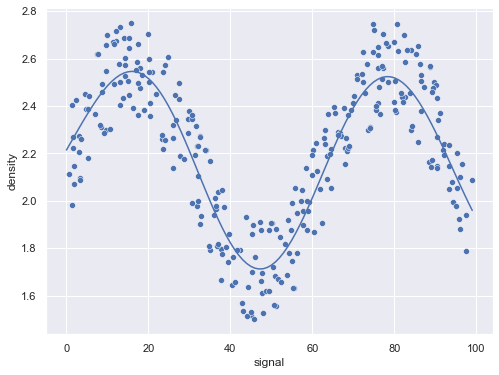

In [106]:
from sklearn.svm import SVR

calc_predictions(SVR())

R2:  0.6610994403624469
MAE:  0.14618563628488068
MSE:  0.031588953695354006
RMSE:  0.1777328154712967


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


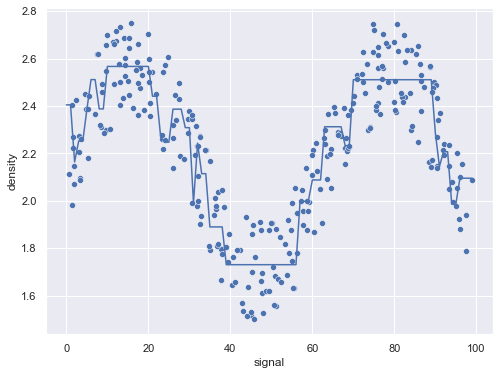

In [121]:
from sklearn.tree import DecisionTreeRegressor

# calc_predictions(DecisionTreeRegressor())
calc_predictions(DecisionTreeRegressor(max_depth=5))

R2:  0.7251485640201665
MAE:  0.13284523084616476
MSE:  0.025618928731053196
RMSE:  0.16005914135422944


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


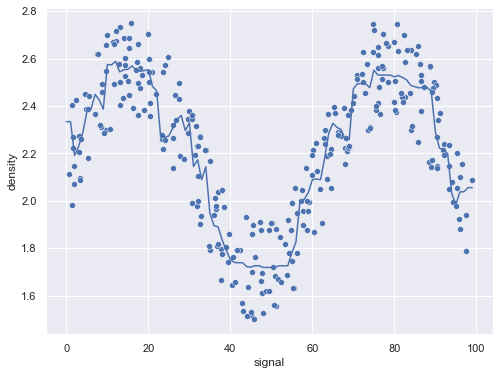

In [120]:
from sklearn.ensemble import RandomForestRegressor

calc_predictions(RandomForestRegressor(max_depth=5))

R2:  0.7649640424138279
MAE:  0.12833997523562435
MSE:  0.021907724168036685
RMSE:  0.1480125811140279


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


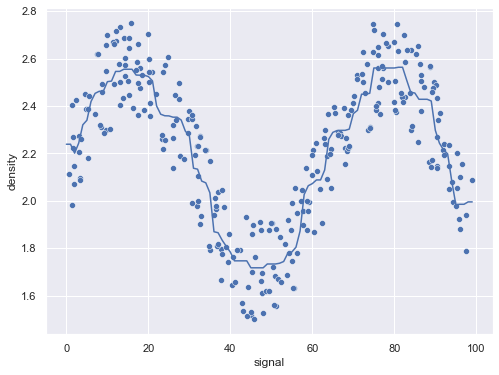

In [140]:
from sklearn.ensemble import AdaBoostRegressor

# calc_predictions(AdaBoostRegressor(n_estimators=200))
calc_predictions(AdaBoostRegressor(n_estimators=200,random_state=42))

R2:  0.7414676893714156
MAE:  0.1304125721141916
MSE:  0.024097821490567658
RMSE:  0.15523473029759693


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


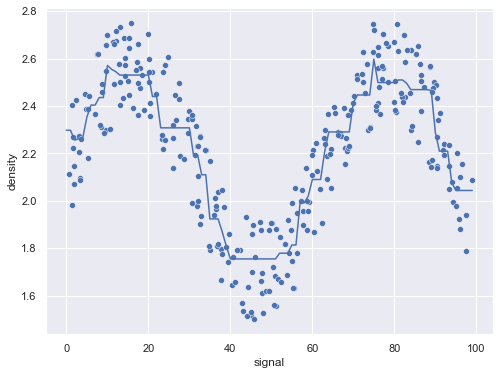

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

calc_predictions(GradientBoostingRegressor(n_estimators=30))